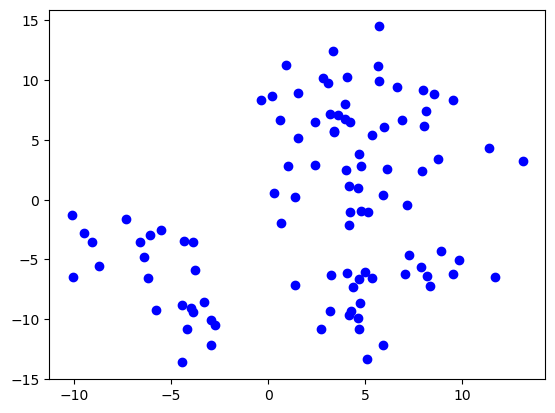

In [8]:
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances, pairwise_distances_argmin_min, pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import numpy as np
import warnings

warnings.filterwarnings("ignore")

n_samples = 100
random_state = 18
cluster_std = 2
centers = 8

x, y = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=cluster_std, centers=centers)

plt.figure('Визуализация сгенерированных данных без привязки к классам')
plt.scatter(x[:, 0], x[:, 1], c='b')
plt.show()

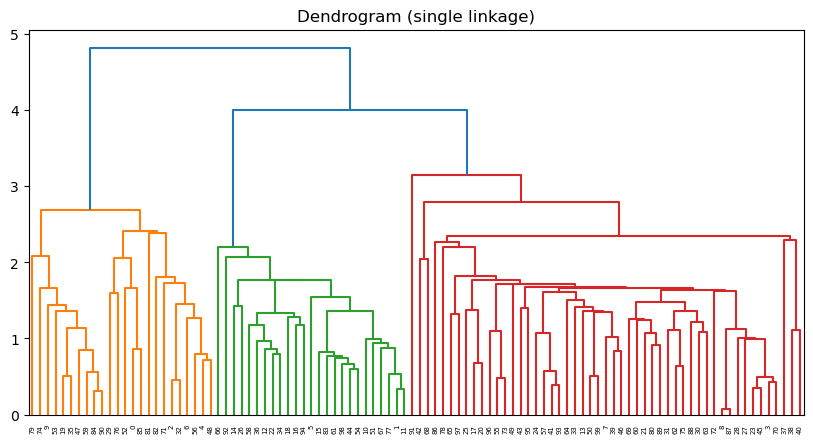

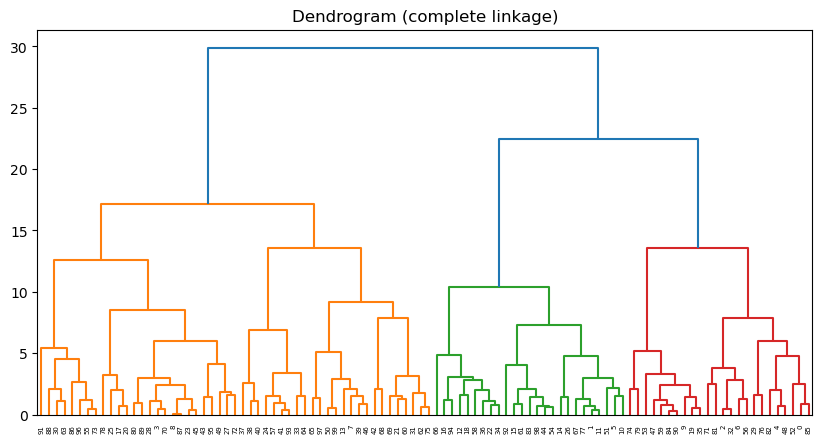

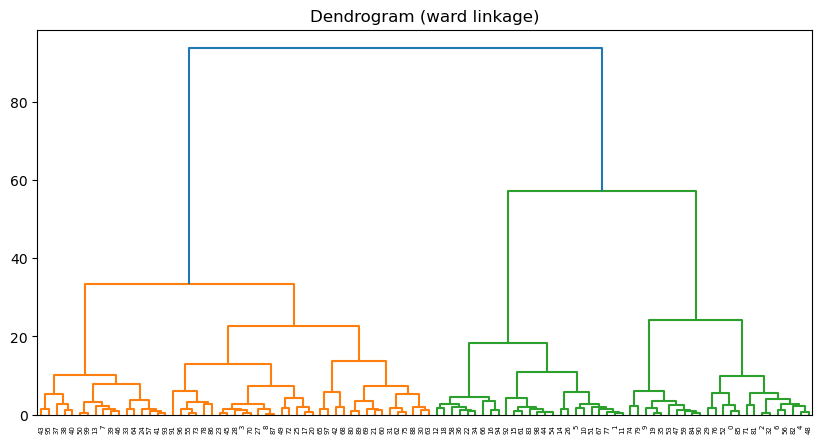

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [9]:
methods = ['single', 'complete', 'ward']

for i, method in enumerate(methods):
    plt.figure(f"Dendrogram ({method} linkage)", figsize=(10, 5))
    plt.title(f"Dendrogram ({method} linkage)")
    dend = shc.dendrogram(shc.linkage(x, method=method))
    plt.show()

Z = linkage(x, method='complete')
k = 3
labels = fcluster(Z, k, criterion='maxclust')
centroids = np.zeros((k, x.shape[1]))
for i in range(1, k + 1):
    centroids[i - 1, :] = np.mean(x[labels == i, :], axis=0)


plt.figure(figsize=(8, 6))

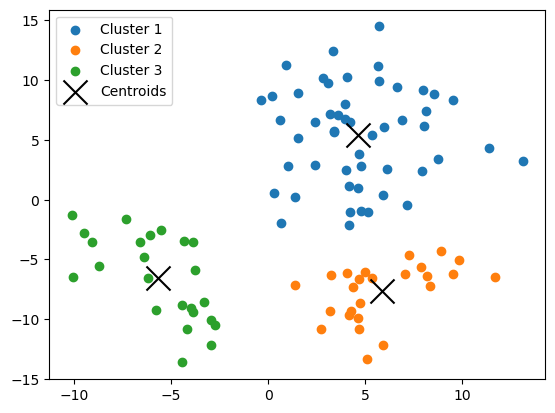

In [10]:
for i in np.unique(labels):
    plt.scatter(x[labels == i, 0], x[labels == i, 1], label='Cluster ' + str(i))

plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='x', label='Centroids')

plt.legend()
plt.show()

In [11]:
intra_cluster_distances = np.zeros(k)
for i in range(1, k + 1):
    centroid = centroids[i - 1]
    cluster_points = x[labels == i, :]
    distances = distance.cdist(cluster_points, [centroid], 'euclidean')
    intra_cluster_distances[i - 1] = np.sum(distances ** 2) / distances.shape[0]

average_intra_cluster_distance = np.mean(intra_cluster_distances)

inter_cluster_distances = np.zeros((k, k))
for i in range(1, k + 1):
    for j in range(1, k + 1):
        distance_matrix = distance.cdist(x[labels == i, :], x[labels == j, :], 'euclidean')
        inter_cluster_distances[i - 1, j - 1] = np.mean(distance_matrix)

average_inter_cluster_distance = np.mean(inter_cluster_distances)

within_cluster_distances = np.zeros(k)
for i in range(1, k + 1):
    for j in range(1, k + 1):
        if i != j:
            distance_matrix = distance.cdist(x[labels == i, :], x[labels == j, :], 'euclidean')
            within_cluster_distances[i - 1] += np.sum(distance_matrix) / (
                    distance_matrix.shape[0] * distance_matrix.shape[1])

average_within_cluster_distance = np.mean(within_cluster_distances)

print("Средняя сумма квадратов расстояний до центроида:", average_intra_cluster_distance)
print("Средняя сумма внутрикластерных расстояний:", average_within_cluster_distance)
print("Средняя сумма межкластерных расстояний:", average_inter_cluster_distance)

Средняя сумма квадратов расстояний до центроида: 17.922169885009094
Средняя сумма внутрикластерных расстояний: 28.387876178827355
Средняя сумма межкластерных расстояний: 11.185762277331229


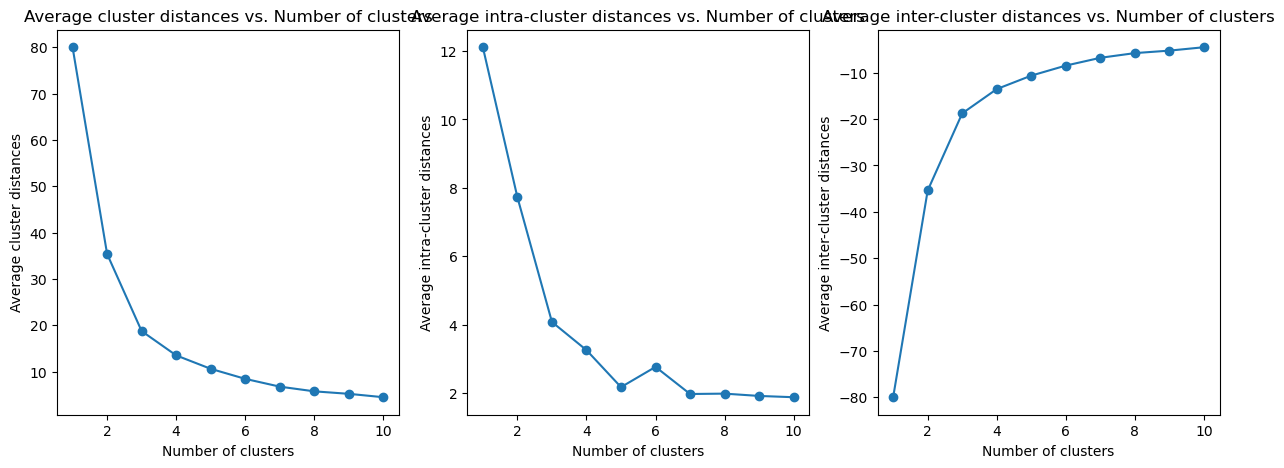

In [12]:
avg_cluster_distances = []
avg_intra_cluster_distances = []
avg_inter_cluster_distances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)

    avg_cluster_distances.append(kmeans.inertia_ / len(x))

    closest, _ = pairwise_distances_argmin_min(x, kmeans.cluster_centers_)
    avg_intra_cluster_distances.append(
        np.mean(np.min(pairwise_distances(x, kmeans.cluster_centers_, metric='euclidean')[closest], axis=1)))

    avg_inter_cluster_distances.append(kmeans.score(x) / len(x))

plt.figure('Addiction', figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, 11), avg_cluster_distances, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average cluster distances')
plt.title('Average cluster distances vs. Number of clusters')

plt.subplot(1, 3, 2)
plt.plot(range(1, 11), avg_intra_cluster_distances, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average intra-cluster distances')
plt.title('Average intra-cluster distances vs. Number of clusters')

plt.subplot(1, 3, 3)
plt.plot(range(1, 11), avg_inter_cluster_distances, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average inter-cluster distances')
plt.title('Average inter-cluster distances vs. Number of clusters')

plt.show()